# Analisi del comportamento di overfitting e underfitting del decision tree finale

L'obiettivo è capire come varia la performance del modello al variare della profondità dell'albero, confrontando i risultati sia sul training set che sul test set

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt


Vengono fatte le predizioni e per ogni metriche abbiamo due strutture dati associate per salvare i dati sul train e sul test

In [10]:
import pandas as pd
X_train = pd.read_csv("../data/splitted/X_train.csv")
X_test = pd.read_csv("../data/splitted/X_test.csv")
y_train = pd.read_csv("../data/splitted/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted/y_test.csv").values.ravel()

train_acc, test_acc = [], []
train_f1, test_f1 = [], []
train_precision, test_precision = [], []
train_recall, test_recall = [], []
depths = range(2, 20)

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    train_f1.append(f1_score(y_train, y_pred_train))
    test_f1.append(f1_score(y_test, y_pred_test))
    train_precision.append(precision_score(y_train, y_pred_train))
    test_precision.append(precision_score(y_test, y_pred_test))
    train_recall.append(recall_score(y_train, y_pred_train))
    test_recall.append(recall_score(y_test, y_pred_test))


Una volta ottenuto i risultati andiamo a mostrare graficamente l'andamento sia sul test che sul train set per ogni metrica al variare di max_depth

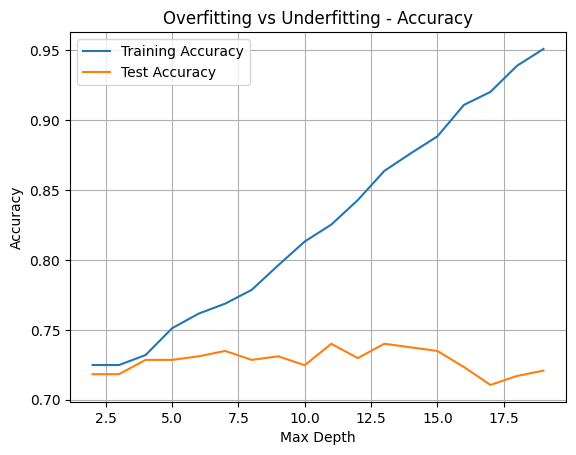

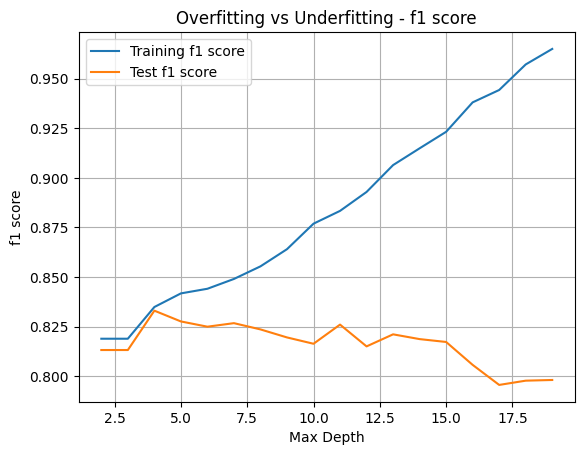

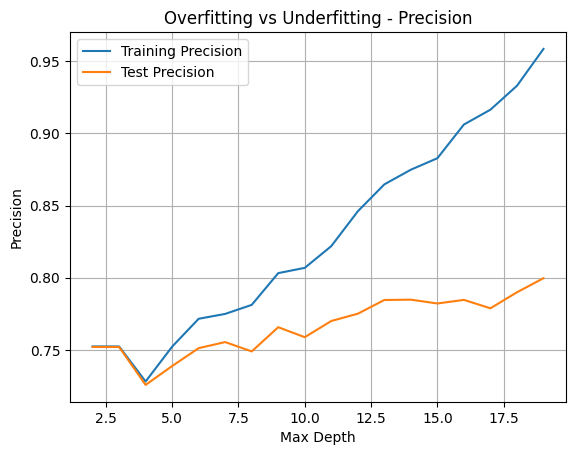

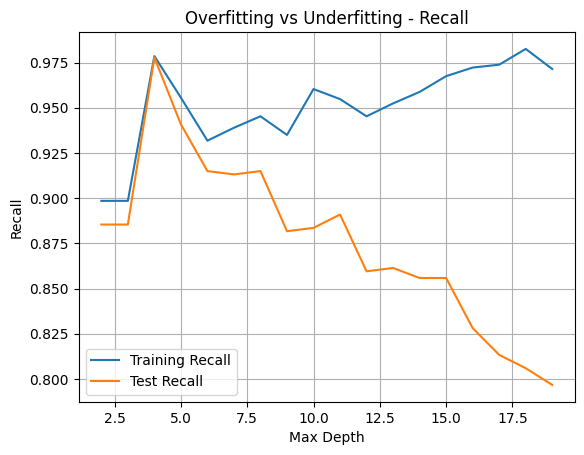

In [11]:
plt.plot(depths, train_acc, label='Training Accuracy')
plt.plot(depths, test_acc, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting vs Underfitting - Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.plot(depths, train_f1, label='Training f1 score')
plt.plot(depths, test_f1, label='Test f1 score')
plt.xlabel('Max Depth')
plt.ylabel('f1 score')
plt.title('Overfitting vs Underfitting - f1 score')
plt.legend()
plt.grid(True)
plt.show()




plt.plot(depths, train_precision, label='Training Precision')
plt.plot(depths, test_precision, label='Test Precision')
plt.xlabel('Max Depth')
plt.ylabel('Precision')
plt.title('Overfitting vs Underfitting - Precision')
plt.legend()
plt.grid(True)
plt.show()




plt.plot(depths, train_recall, label='Training Recall')
plt.plot(depths, test_recall, label='Test Recall')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.title('Overfitting vs Underfitting - Recall')
plt.legend()
plt.grid(True)
plt.show()
